# Lab 6 - Evaluation

## lecture 6

In [1]:
    library('FNN')

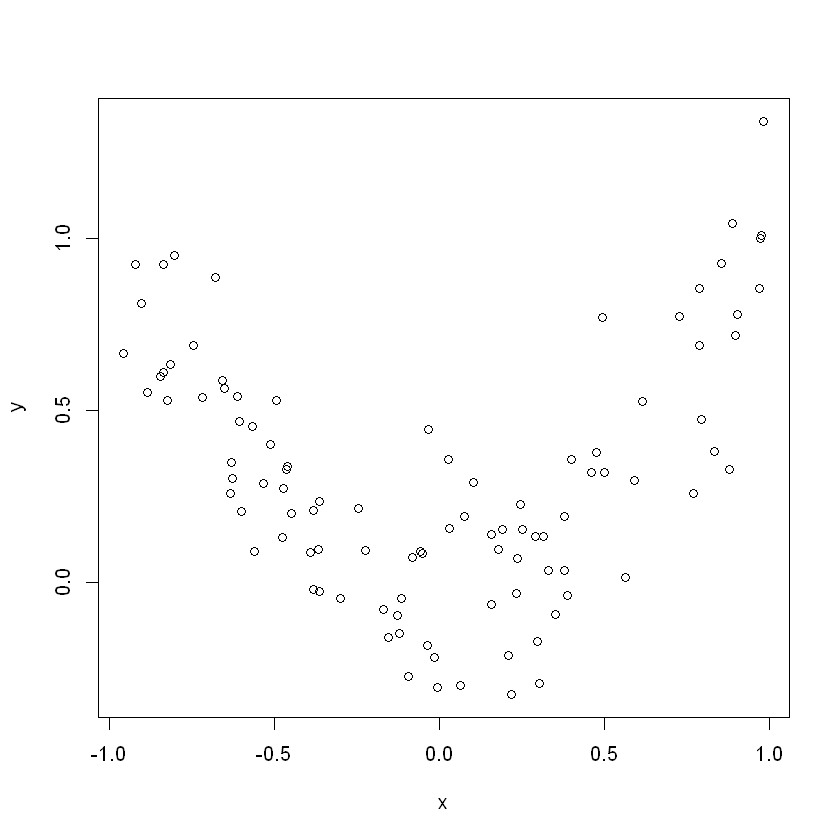

In [2]:
x = array(sort(runif(100,-1,1)),c(100,1))
y = x^2 + rnorm(100,0,1/5)
plot(x,y)

let's split the data into validation and training

In [3]:
train_ss = sample(nrow(x),floor(nrow(x)/2))
val_ss = setdiff(1:nrow(x),train_ss)

In [4]:
trainx = x[train_ss,,drop=FALSE]
valx = x[val_ss,,drop=FALSE]
trainy = y[train_ss,,drop=FALSE]
valy = y[val_ss,,drop=FALSE]

evaluate = function(pred_x,pred_y,K=10){
    knn_mod = knn.reg(train=trainx,test=pred_x,y=trainy,k=K)
    RSS = sum((knn_mod$pred - pred_y)^2)
    return(RSS)
}

In [5]:
K_seq = seq(1,46,2)

In [6]:
train_RSSs = sapply(K_seq,function(K)evaluate(trainx,trainy,K=K))
val_RSSs = sapply(K_seq,function(K)evaluate(valx,valy,K=K))

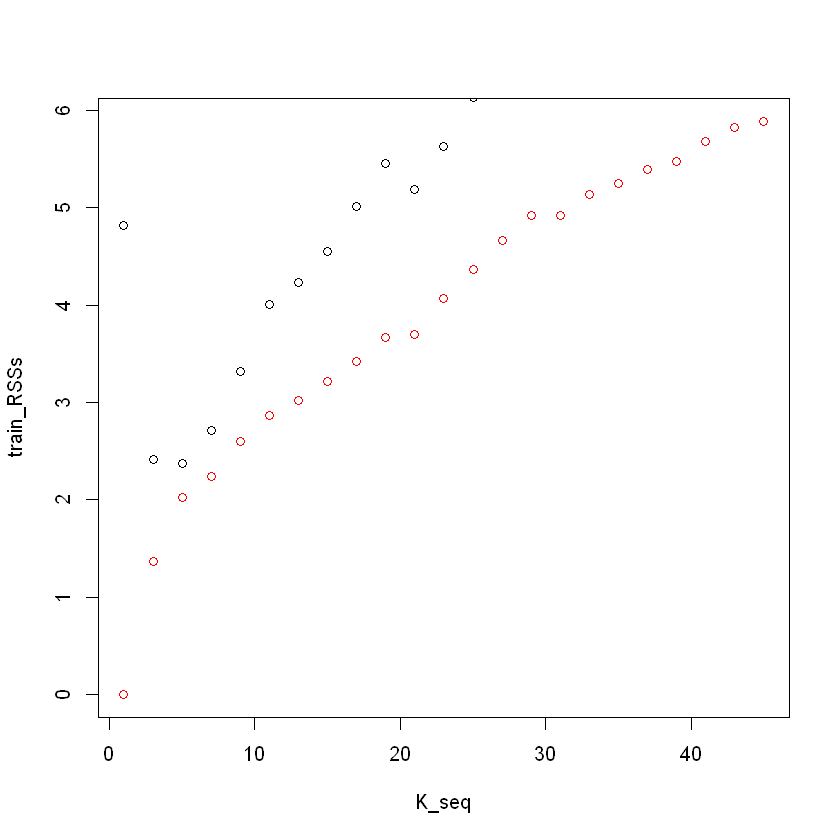

In [7]:
plot(K_seq,train_RSSs,col='red')
points(K_seq,val_RSSs)

In [8]:
K_hat = K_seq[which.min(val_RSSs)]
K_hat

[1] 5

In [9]:
min(val_RSSs)

[1] 2.369076

In [10]:
testx = array(sort(runif(50,-1,1)),c(50,1))
testy = testx^2 + rnorm(50,0,1/5)
best_knn = knn.reg(train=trainx,test=testx,y=trainy,k=K_hat)
pred_y_ind = best_knn$pred
sum((pred_y_ind - testy)^2) #RSS

[1] 2.614083

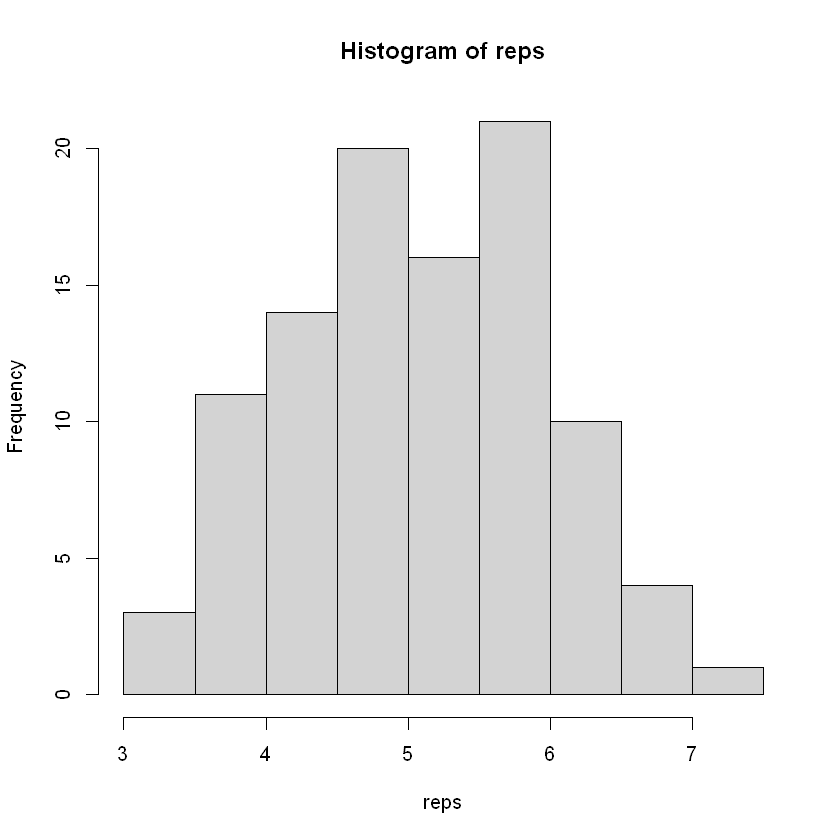

In [11]:
reps = replicate(100,{
    x_ind = array(sort(runif(50,-1,1)),c(100,1))
    y_ind = x_ind^2 + rnorm(50,0,1/5)
    best_knn = knn.reg(train=trainx,test=x_ind,y=trainy,k=K_hat)
pred_y_ind = best_knn$pred
    sum((pred_y_ind - y_ind)^2)
})
hist(reps)